In [23]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
from time import sleep
import re
import pandas as pd
from datetime import datetime
from urllib.request import urlopen

# 페이지 오픈

In [32]:
search = input("검색어 입력: ")
driver_path = "./driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
url = "https://www1.president.go.kr/search"
driver.get(url)
driver.find_element_by_css_selector('#contents > div.search_PG_check > div > div.PG_calBtn > ul > li:nth-child(1) > ul > li > img').click()
driver.find_element_by_css_selector('#ui-datepicker-div > div > div > select.ui-datepicker-month').click()
driver.find_element_by_css_selector('#ui-datepicker-div > div > div > select.ui-datepicker-month > option:nth-child(1)').click()
driver.find_element_by_css_selector('#ui-datepicker-div > table > tbody > tr:nth-child(1) > td:nth-child(2) > a').click()
driver.find_element_by_css_selector('#contents > div.search_PG_check > div > div.PG_calBtn > ul > li:nth-child(3) > ul > li > img').click()
driver.find_element_by_css_selector('#ui-datepicker-div > div > div > select.ui-datepicker-month').click()
driver.find_element_by_css_selector('#ui-datepicker-div > div > div > select.ui-datepicker-month > option:nth-child(10)').click()
driver.find_element_by_css_selector('#ui-datepicker-div > table > tbody > tr:nth-child(5) > td:nth-child(4) > a').click()
driver.find_element_by_css_selector('#query').send_keys(search)
driver.find_element_by_css_selector('#login > li.search_PGbox_btn > input[type="image"]').click()
driver.find_element_by_css_selector('#contents > div.search_PG_contens > div > ul > li:nth-child(6) > a').click()

검색어 입력: 민호


In [3]:
path = ('//*[@id="contents"]/div[2]/div/div[3]/div/div[2]/a[1]')
driver.find_element_by_xpath(path).click()
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [10]:
type(soup.find_all("a", "on")[0].text)

str

# 크롤링 실시

In [25]:
soup2 = []

try:
    while True:
        a = 1
        b = 7*a

        for i in range(b):
            path = ('//*[@id="contents"]/div[2]/div/div[3]/div/div[2]/a[{}]'.format(i+1))
            driver.find_element_by_xpath(path).click()
            html = driver.page_source
            soup = BeautifulSoup(html, "lxml")
            soup2.append(soup)
            sleep(2)

        driver.find_element_by_xpath('//*[@id="contents"]/div[2]/div/div[3]/div/div[3]/a').click()
        a += 1
        sleep(5)
        
        if int(soup.find_all("a", "on")[0].text) != i:
            data3 = soup2
            print("크롤링 완료! data3을 불러주세요")
            
            break

        if a%50 == 0:
            sleep(60)
        else :
            pass
except:
    print("크롤링 실패!")


크롤링 완료!


In [29]:
data3[0]

<!DOCTYPE html>
<html class=" js csstransitions" lang="ko" style="height: auto;" xmlns="http://www.w3.org/1999/xhtml"><head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description"/>
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords"/>
<meta content="청와대 (CHEONGWADAE)" name="author"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="website" property="og:type"/>
<meta content="담요" property="og:title"/>
<meta content="http://www.president.go.kr/" property="og:url"/>
<meta content="담요" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="http://president.go.kr/css/favicon_400x210.png" property="og:image"/>
<meta content=" http:/

# html로부터 제목, 세부페이지 정보 가져오기

In [30]:
Date = []
Title = []
Url = []

try:
    for i in range(len(data3)):

        for r in list(range(10)):
            date = data3[i].find_all("ul", "PG_peti_list")[r].find("li").text
            date2 = re.search("\d{4}[-]\d{2}[-]\d{2}", date).group().replace("-", "")
            date3 = datetime.strptime(date2, '%Y%m%d')

            title = data3[i].find_all("div", "PG_contens_pd_list")[r].find("h2").text

            url2 = data3[i].find_all("div", "PG_contens_pd_list")[r].find("a")["href"]
            url3 = "https://www1.president.go.kr"+ url2

            Date.append(date3)
            Title.append(title)
            Url.append(url3)
        if i % 20 ==0:
            print(i)
    df1 = pd.DataFrame({"날짜": Date, "제목": Title, "주소": Url})
    print("분석 완료! 결과값: df1")
            
except:
    print("분석 실패!")
    


0
분석 완료! 결과값: df1


In [31]:
df1

,날짜,제목,주소
0,2018-10-30,"모든 학교의 화장, 복장 규제를 없애주세요",https://www1.president.go.kr/petitions/425617
1,2018-10-21,교복 폐지,https://www1.president.go.kr/petitions/413931
2,2018-10-19,비효율성인 교복을 없애주세요.,https://www1.president.go.kr/petitions/411058
3,2018-10-14,안녕하세요. 노숙자 분이 부모님이라고 생각해주시고 봐주세요.,https://www1.president.go.kr/petitions/406214
4,2018-10-13,진짜 너무한 거 아닌가요? 학생도 선생님과 똑같이 추위를 느낍니다.,https://www1.president.go.kr/petitions/405978
5,2018-10-11,평범한 사람의 판단에 맡깁니다.,https://www1.president.go.kr/petitions/403890
6,2018-10-05,"서울 교육청 두발 자율화 반대, 교복 개정 및 보안 찬성",https://www1.president.go.kr/petitions/398626
7,2018-10-03,대구 모든중학교에 사복입을수 있게 해주세료,https://www1.president.go.kr/petitions/396929
8,2018-09-27,문재인 대통령께 표창 받은 병원에서 겪은 이상한 일들을 알립니다.,https://www1.president.go.kr/petitions/391268
9,2018-09-27,아기고양이 살려주세요,https://www1.president.go.kr/petitions/391048


In [295]:
df1.to_csv("data/4th1.csv", sep=',', encoding='UTF-8')

# 세부 페이지에서 내용 가져오기

In [291]:
P = []
T = []

try:
    for i in range(len(df1["주소"])):
        url = df1["주소"].values[i]
        html = urlopen(url)
        soup = BeautifulSoup(html, "lxml")

        p = soup.find_all("h2", "petitionsView_count")[0].find("span").text
        P.append(p)

        t = soup.find_all("div", "View_write")[0].text.replace("\r", "").replace("\n", "").replace("\t", "")
        T.append(t)

        if i%20 ==0:
            print(i)
            
except:
    print("본문 크롤링 실패!")
    
df1["청원인"] = P
df1["본문"] = T

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660


In [ ]:
# 파일로 저장
df1.to_csv("data/4th2.csv", sep=',', encoding='UTF-8')

In [8]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook
han = Hannanum()
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df1 = pd.read_csv("./4th2.csv", encoding = "utf-8")
df2 = pd.read_csv("./work2.csv", encoding = "utf-8")

In [4]:
title4th = []
for i in range(10):
    start = 0 + 100*i
    end = 100 + 100*i
    text = df1["제목"][start:end]
    textfull = ". ".join(text)
    title4th.append(textfull)

In [6]:
nouns4th = []
a = 0

for i in title4th:
    a +=1
    print("형태소 분석 시작{}".format(a))
    nountemp = han.nouns(i)
    nouns4th.extend(nountemp)


형태소 분석 시작1
형태소 분석 시작2
형태소 분석 시작3
형태소 분석 시작4
형태소 분석 시작5
형태소 분석 시작6
형태소 분석 시작7
형태소 분석 시작8
형태소 분석 시작9
형태소 분석 시작10


In [9]:
one_words2 = []
tow_words2 = []
etc_words2 = []
for noun in nouns4th:
    if len(noun) == 1:
        one_words2.append(noun)
    elif len(noun) == 2:
        tow_words2.append(noun)
    else:
        etc_words2.append(noun)
        
len(one_words2), len(tow_words2), len(etc_words2)

(398, 2192, 2398)

In [10]:
stop_words_4th = ['청원','정부','한국','문재','대통령님']
stop_words_4th.extend(one_words2)
len(stop_words_4th)

403

In [11]:
fourth_nouns = [word for word in nouns4th if word not in stop_words_4th]
len(fourth_nouns)

4449

In [12]:
fourth_nouns = nltk.Text(fourth_nouns, name = "일자리")
fourth_noun_common = fourth_nouns.vocab().most_common()

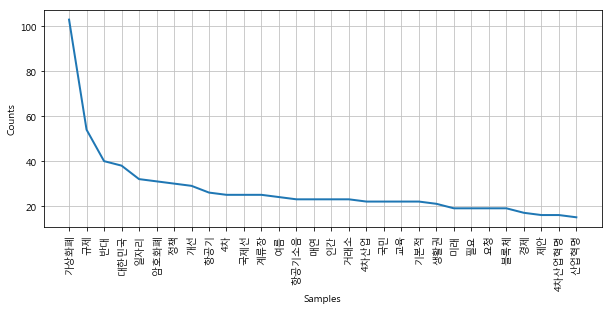

In [13]:
plt.figure(figsize=(10,4))
fourth_nouns.plot(30)
plt.show()

In [14]:
fourth_nouns.collocations(window_size=3)

국제선 계류장; 계류장 항공기; 계류장 항공기소음; 국제선 항공기소음; 항공기소음 항공기; 기본적 생활권; 김포공항 계류장;
김포공항 국제선; 가상화폐 거래소; 제작자및 유포자; 김상조 공정거래위원장; 실타래 느낀점; 장려정책 쪽박차; 제정해
암호화페; 채굴회사 대체에너지; 청년실업문제의얽힌 느낀점; 청년실업문제의얽힌 실타래; 치기공사 졸업생; 금감원장 금융위원장;
원자력 발전소


(-0.5, 399.5, 199.5, -0.5)

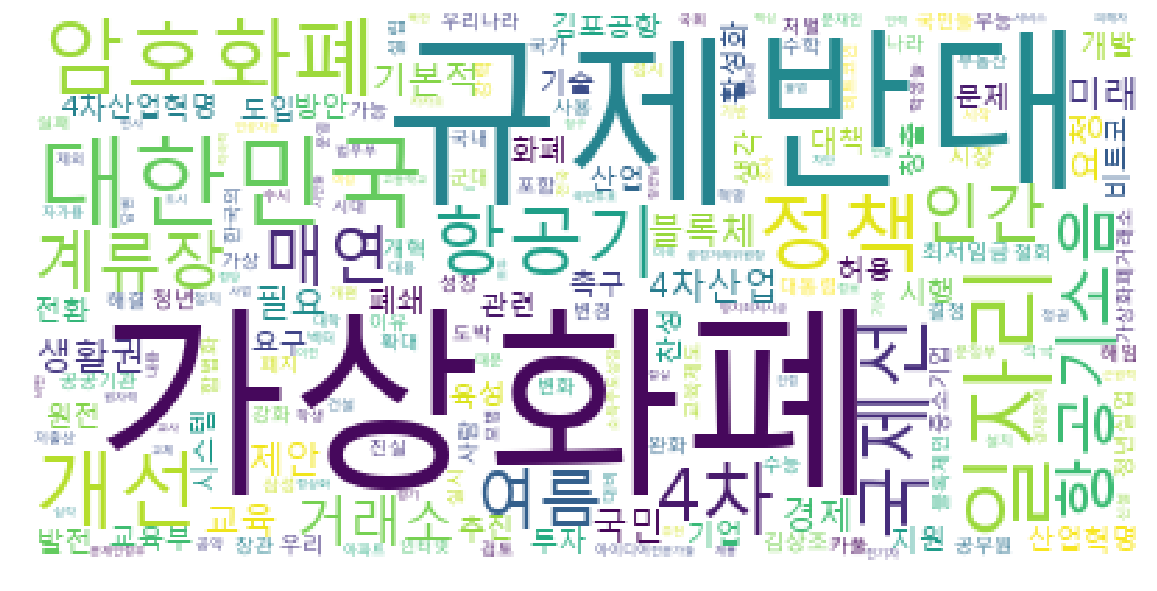

In [17]:
fw = dict(fourth_noun_common)
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(fw)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

In [18]:
titlework = []
for i in range(120):
    start = 0 + 100*i
    end = 100 + 100*i
    text = df2["제목"][start:end]
    textfull = ". ".join(text)
    titlework.append(textfull)

In [19]:
nounswork = []
a = 0

for i in titlework:
    a +=1
    print("형태소 분석 시작{}".format(a))
    nountemp = han.nouns(i)
    nounswork.extend(nountemp)

nouns2 = ", ".join(nounswork)

형태소 분석 시작1
형태소 분석 시작2
형태소 분석 시작3
형태소 분석 시작4
형태소 분석 시작5
형태소 분석 시작6
형태소 분석 시작7
형태소 분석 시작8
형태소 분석 시작9
형태소 분석 시작10
형태소 분석 시작11
형태소 분석 시작12
형태소 분석 시작13
형태소 분석 시작14
형태소 분석 시작15
형태소 분석 시작16
형태소 분석 시작17
형태소 분석 시작18
형태소 분석 시작19
형태소 분석 시작20
형태소 분석 시작21
형태소 분석 시작22
형태소 분석 시작23
형태소 분석 시작24
형태소 분석 시작25
형태소 분석 시작26
형태소 분석 시작27
형태소 분석 시작28
형태소 분석 시작29
형태소 분석 시작30
형태소 분석 시작31
형태소 분석 시작32
형태소 분석 시작33
형태소 분석 시작34
형태소 분석 시작35
형태소 분석 시작36
형태소 분석 시작37
형태소 분석 시작38
형태소 분석 시작39
형태소 분석 시작40
형태소 분석 시작41
형태소 분석 시작42
형태소 분석 시작43
형태소 분석 시작44
형태소 분석 시작45
형태소 분석 시작46
형태소 분석 시작47
형태소 분석 시작48
형태소 분석 시작49
형태소 분석 시작50
형태소 분석 시작51
형태소 분석 시작52
형태소 분석 시작53
형태소 분석 시작54
형태소 분석 시작55
형태소 분석 시작56
형태소 분석 시작57
형태소 분석 시작58
형태소 분석 시작59
형태소 분석 시작60
형태소 분석 시작61
형태소 분석 시작62
형태소 분석 시작63
형태소 분석 시작64
형태소 분석 시작65
형태소 분석 시작66
형태소 분석 시작67
형태소 분석 시작68
형태소 분석 시작69
형태소 분석 시작70
형태소 분석 시작71
형태소 분석 시작72
형태소 분석 시작73
형태소 분석 시작74
형태소 분석 시작75
형태소 분석 시작76
형태소 분석 시작77
형태소 분석 시작78
형태소 분석 시작79
형태소 분석 시작80
형태소 분석 시작81
형태소 분석 시작82
형태소 분석 시작83
형태소 분석 시작84
형

In [20]:
one_words1 = []
tow_words1= []
etc_words1= []
for noun in nounswork:
    if len(noun) == 1:
        one_words1.append(noun)
    elif len(noun) == 2:
        tow_words1.append(noun)
    else:
        etc_words1.append(noun)
        
len(one_words1), len(tow_words1), len(etc_words1)

(4197, 20180, 26546)

In [21]:
stop_words_work = ["일자리", '청원','정부','한국','문재','대통령님']
stop_words_work.extend(one_words1)
len(stop_words_work)
work_nouns = [word for word in nounswork if word not in stop_words_work]
len(work_nouns)

43785

In [22]:
work_nouns1 = nltk.Text(work_nouns, name = "일자리")
work_noun_common = work_nouns1.vocab().most_common()

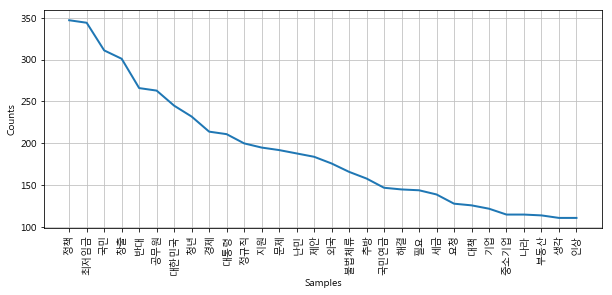

In [23]:
plt.figure(figsize=(10,4))
work_nouns1.plot(30)
plt.show()

In [24]:
work_nouns1.collocations(window_size=3)

기초연금지급 대선공약; 정규직 정규직; ◈문재인정부 근본적; 파견직 직접고용; 가상화폐 거래소; 다산신도시 실버택배; 금감원
회계위반고시; 공영방송 파견직; 은행원 퇴직금; 공공부문 정규직; ☻문대통령 기초연금지급; ☻문대통령 대선공약; 공공기관
지방이전; 민간어린이집 가정어린이집; 불법난민 불법체류; 어린이집 유치원; 회계위반고시 주주들; 삼성바이로직스 주주들;
소상공인진흥공단 신용보증재단; 소상공인진흥공단 중소기업산업진흥원


(-0.5, 399.5, 199.5, -0.5)

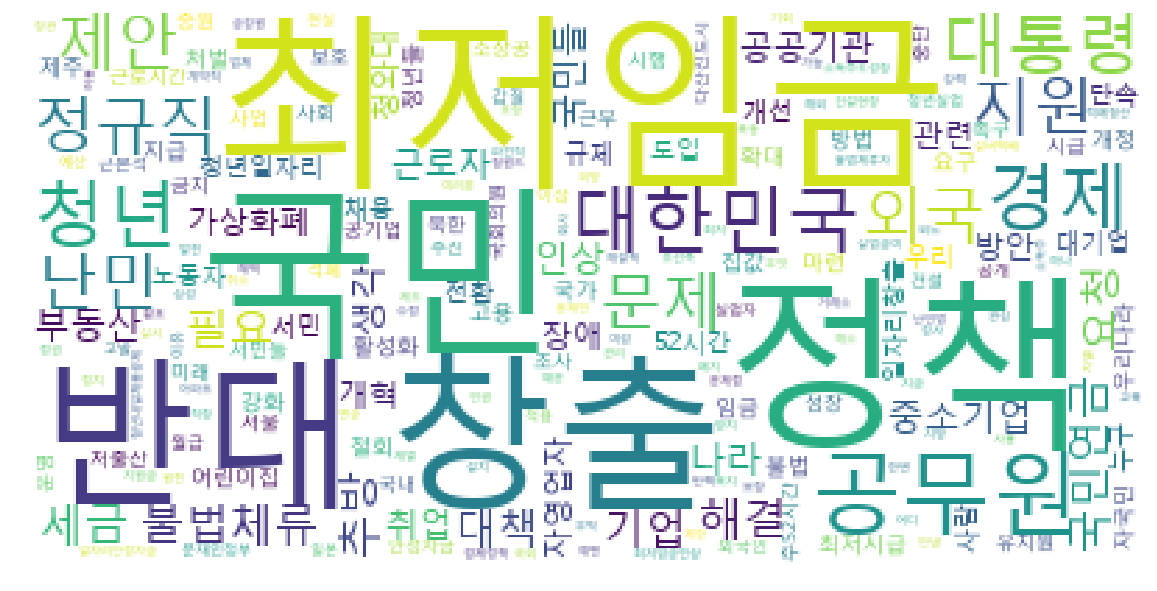

In [26]:
ww = dict(work_noun_common)
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(ww)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

In [27]:
df1 = pd.read_csv("./4th2.csv", encoding = "utf-8")
d2 = df1.groupby("날짜").size()
df2 = pd.read_csv("./new/final_it.csv", encoding = "utf-8")
df3 = pd.read_csv("./4thIndustry.csv", encoding = "utf-8")

In [29]:
l = df2["Date"]
l2 = []
for i in l:
    d = i[:-3].replace(" ", "")
    l2.append(d)
df2["날짜2"] = l2

In [30]:
df2['date1'] = df2["날짜2"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))
df3['date1'] = df3["Date"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))
df1['date1'] = df1["날짜"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))